# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
        city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']  # Latitude
        city_lng = city_weather['coord']['lon']  # Longitude
        city_max_temp = city_weather['main']['temp_max']  # Max Temperature
        city_humidity = city_weather['main']['humidity']  # Humidity
        city_clouds = city_weather['clouds']['all']  # Cloudiness
        city_wind = city_weather['wind']['speed']  # Wind Speed
        city_country = city_weather['sys']['country']  # Country code
        city_date = city_weather['dt']  # Date (timestamp)

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand falls-windsor
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
City not found. Skipping...
Processing Record 3 of Set 1 | nar'yan-mar
City not found. Skipping...
Processing Record 4 of Set 1 | gisborne
City not found. Skipping...
Processing Record 5 of Set 1 | laojunmiao
City not found. Skipping...
Processing Record 6 of Set 1 | avarua
City not found. Skipping...
Processing Record 7 of Set 1 | kibakwe
City not found. Skipping...
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | antigo
City not found. Skipping...
Processing Record 10 of Set 1 | braslaw
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 12 of Set 1 | alotau
City not found. Skipping...
Processing Record 13 of Set 1 | batal
City not found. Skipping...
Processing Record 14 of Set 1 | east london

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yangambi,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
1,revda,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
2,posto fiscal rolim de moura,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
3,waitangi,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
4,blackmans bay,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yangambi,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
1,revda,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
2,posto fiscal rolim de moura,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
3,waitangi,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
4,blackmans bay,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

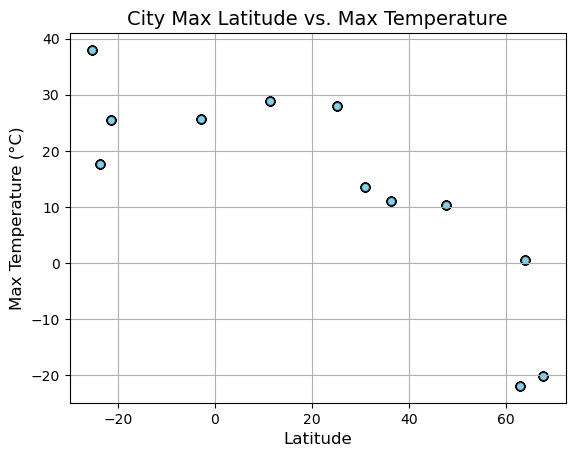

In [ ]:

#  Build scatter plot for latitude vs. temperature

# Extract Latitude and Max Temp from the city_data
lats = [city["Lat"] for city in city_data]  # List of latitudes
max_temps = [city["Max Temp"] for city in city_data]  # List of maximum temperatures

# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolors="black", color="skyblue", alpha=0.7)

# Incorporate other graph properties
plt.title("City Max Latitude vs. Max Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

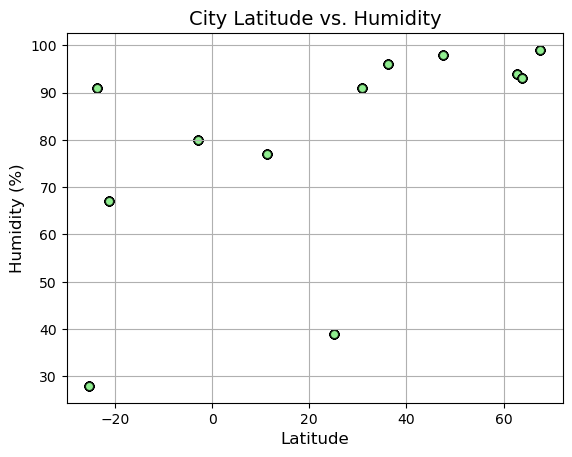

In [ ]:
# Extract Latitude and Humidity from the city_data
lats = [city["Lat"] for city in city_data]  # List of latitudes
humidities = [city["Humidity"] for city in city_data]  # List of humidity values

# Build scatter plot for latitude vs. humidity
plt.scatter(lats, humidities, edgecolors="black", color="lightgreen", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

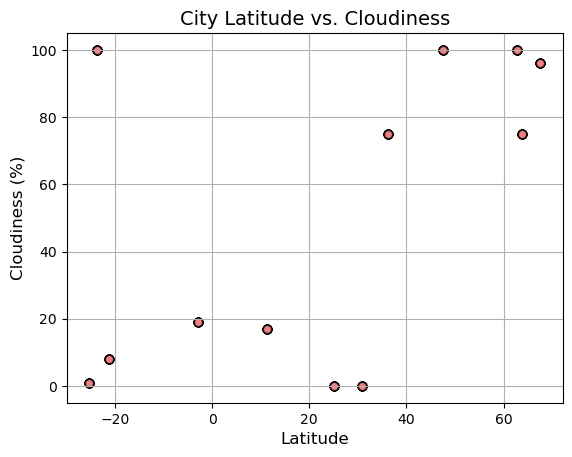

In [ ]:
# Extract Latitude and Cloudiness from the city_data
lats = [city["Lat"] for city in city_data]  # List of latitudes
cloudiness = [city["Cloudiness"] for city in city_data]  # List of cloudiness values

# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolors="black", color="lightcoral", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

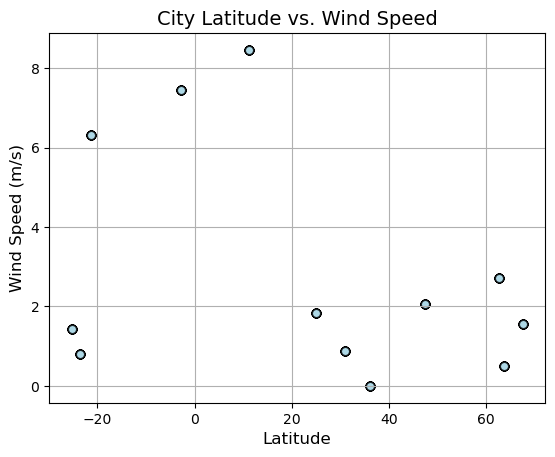

In [ ]:
# Extract Latitude and Wind Speed from the city_data
lats = [city["Lat"] for city in city_data]  # List of latitudes
wind_speeds = [city["Wind Speed"] for city in city_data]  # List of wind speed values

# Build scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speeds, edgecolors="black", color="lightblue", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
50,rajmahal,25.05,87.8333,27.92,39,0,1.84,IN,1731921353
51,yellowknife,25.05,87.8333,27.92,39,0,1.84,IN,1731921353
52,malvan,25.05,87.8333,27.92,39,0,1.84,IN,1731921353
53,punta arenas,25.05,87.8333,27.92,39,0,1.84,IN,1731921353
54,chonchi,25.05,87.8333,27.92,39,0,1.84,IN,1731921353


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yangambi,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
1,revda,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
2,posto fiscal rolim de moura,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
3,waitangi,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055
4,blackmans bay,-25.3,45.4833,38.0,28,1,1.44,MG,1731921055


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.8305673448774497


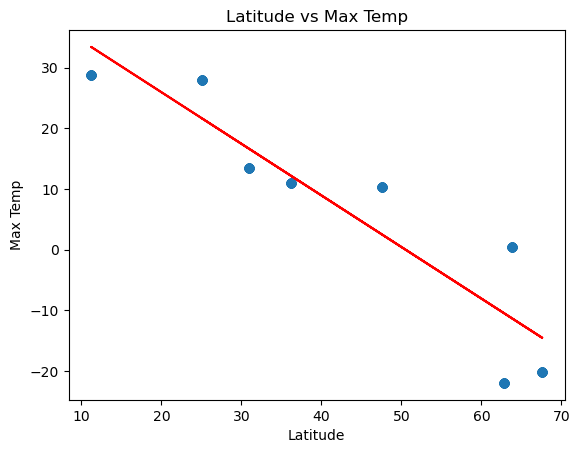

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^2-value is: 0.026898182803475546


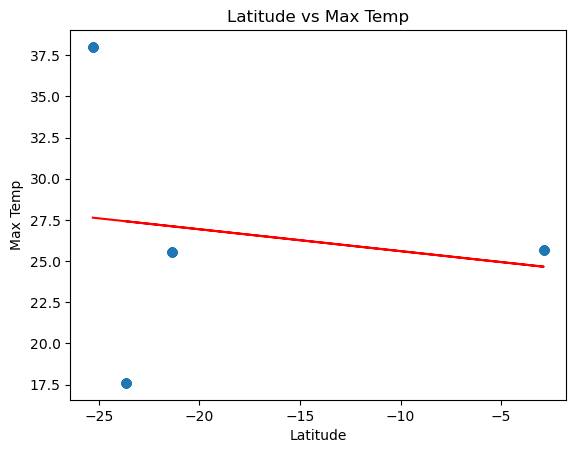

In [ ]:
 # Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.33219587591430016


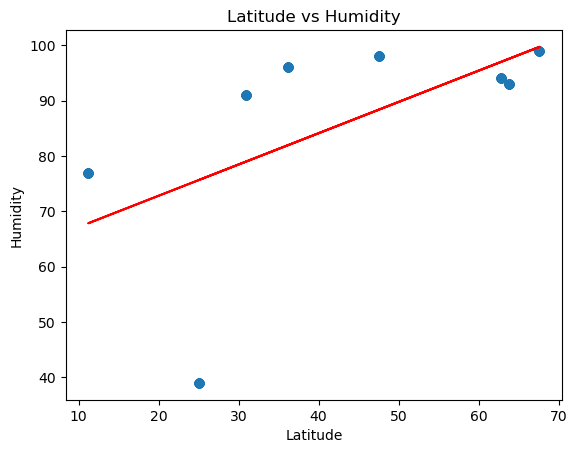

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,10))

The r^2-value is: 0.16189094983557759


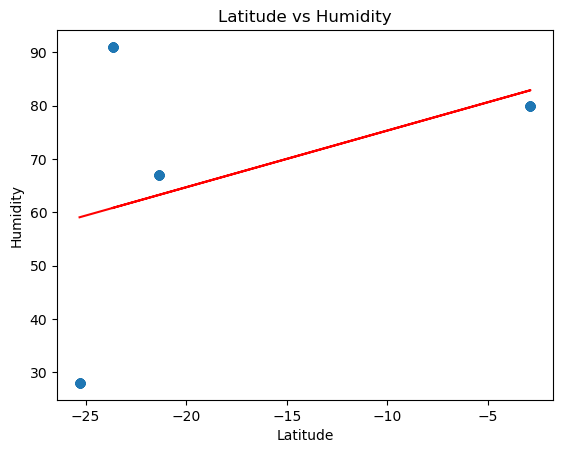

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.6595679791379271


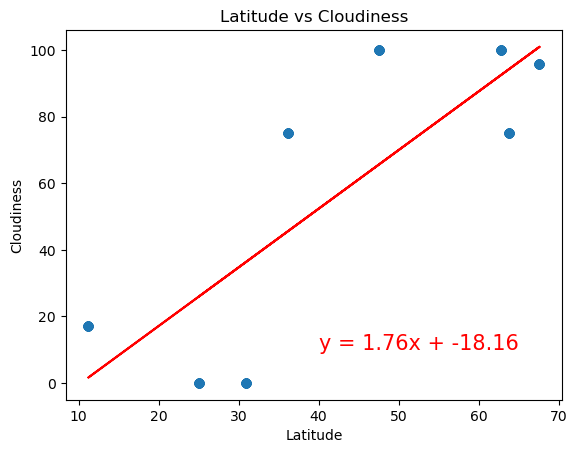

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r^2-value is: 0.03648272478598499


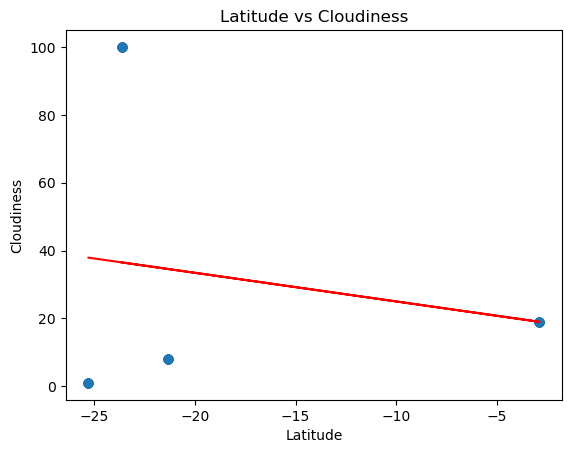

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** As rhe latitude increases from approximately -25 to -5, the cloudiness decreases from 40 to 20. It shoes a negative linear correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.28046599400334926


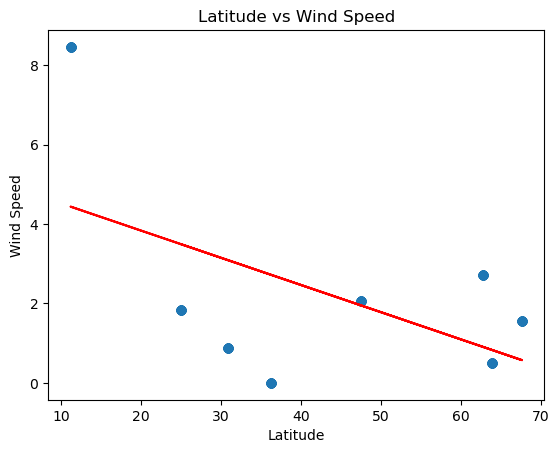

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r^2-value is: 1.0


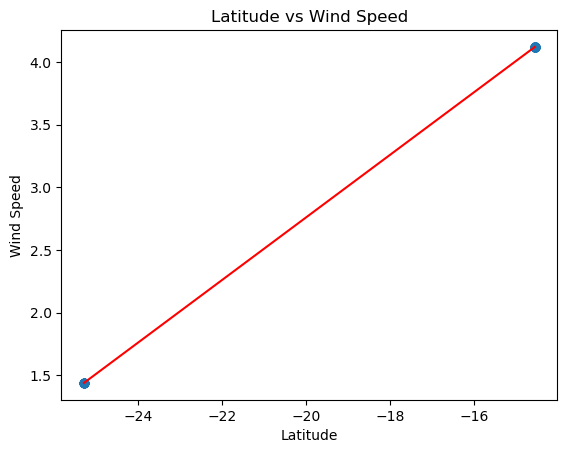

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** As latitude increases from approximately -24 to -16, the wind speed rises from about 1.5 m/s to 4.0 m/s. It shows a positive linear correlation, meaning as the latitude becomes less negative, the wind speed increases.